<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: convolution 1D </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Kriging standard
- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [54]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200


# Data and variogram



In [55]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import theoretical, experimental
from phyton_kriging.standard_1D import kriging1D
from phyton_kriging.convolution_1D_backup import Convolution_1D_backup

In [146]:
num_sensors = 50
sc = .025
I0 = 0.00025

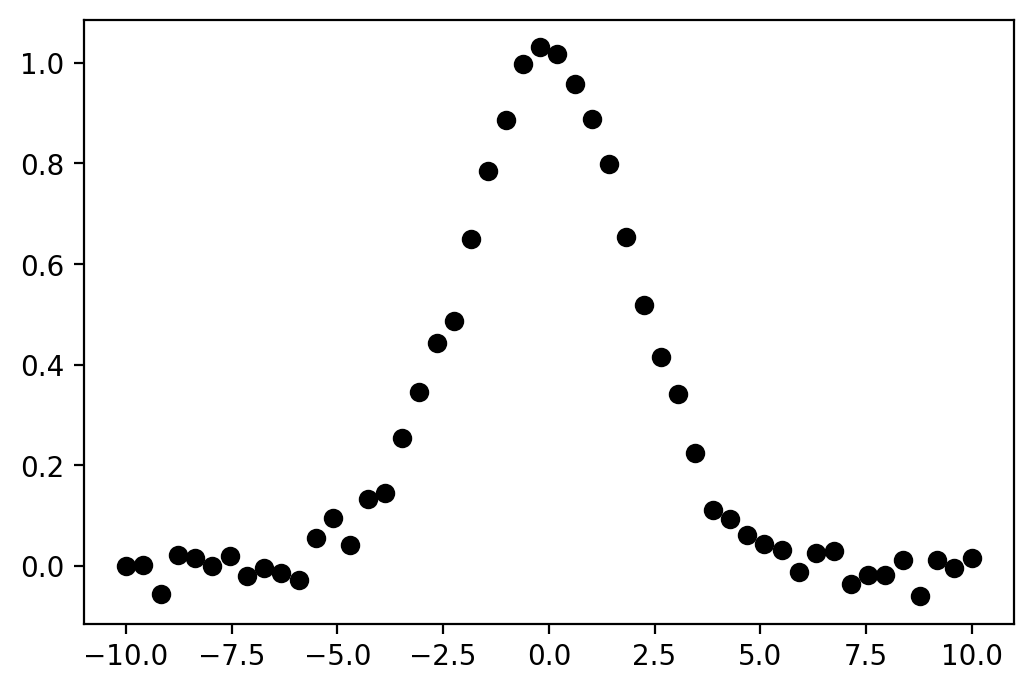

In [147]:
sensors = np.zeros((num_sensors, 3), dtype=float)
x = -10 + 20 * np.random.rand(num_sensors)
x = np.linspace(-10, 10, num_sensors)

sensors[:, 0] = x
sensors[:, 1] = x**2
sensors[:, 1] = x
sensors[:, 1] = 0.1 * x + np.sin(2 * np.pi * x / period)
sensors[:,1 ] = np.exp(-x**2/(2*2**2))

sensors[:, 2] = I0 * np.ones_like(sensors[:, 0])

sensors[:, 1] = sensors[:, 1] + sensors[:, 2] + sc * np.random.randn(num_sensors)


plt.plot(sensors[:, 0], sensors[:, 1], 'ko')

In [148]:
num_sampling = 1000
sampling = np.linspace(-10, 10, num_sampling)


y_ideal = sampling
y_ideal = np.exp(-sampling**2 / (2 * 2**2))


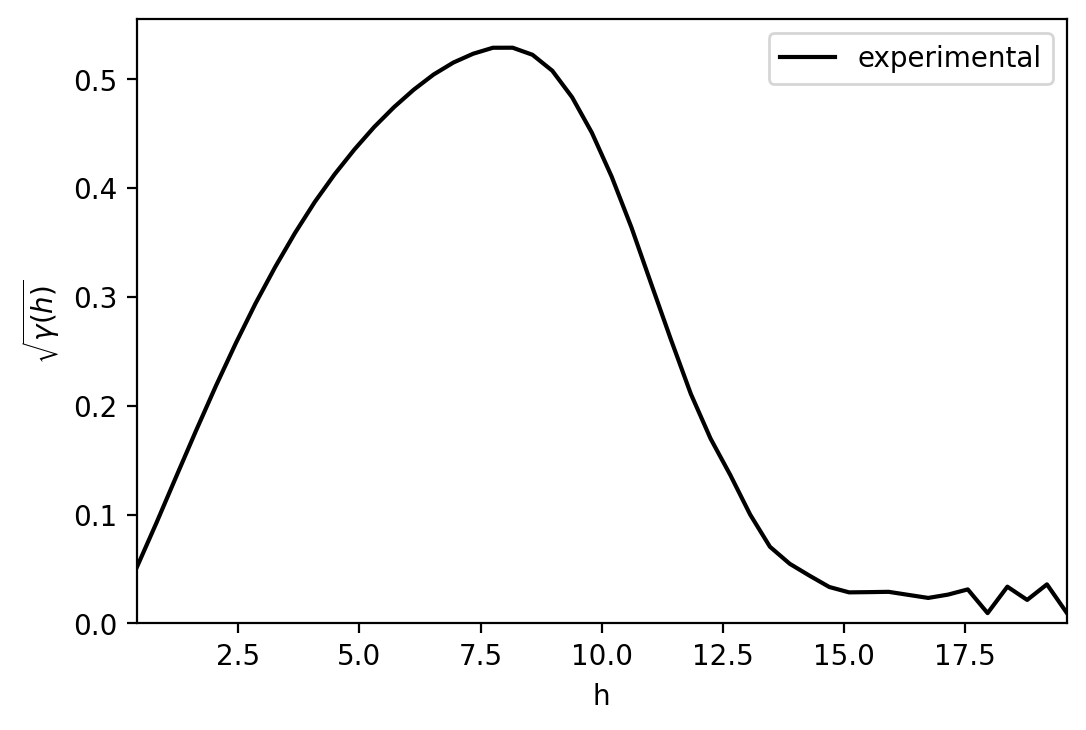

In [149]:
h = np.linspace(0, 10, 200)
var_exp = experimental(x=sensors[:, 0], y=sensors[:, 1])
var_exp.compute(ipoints=np.arange(0,125))
var_exp.draw()
h_exp=var_exp.h
var_exp_data = var_exp.variogram


name = gauss

h: min - 0.0, max - 50.0
variogram: min - 0.0006250000000000001, max - 0.3016648644698074
parameters = {'sc': 0.025, 'A': 0.3010398644698074, 'lc': 4, 'power': None}



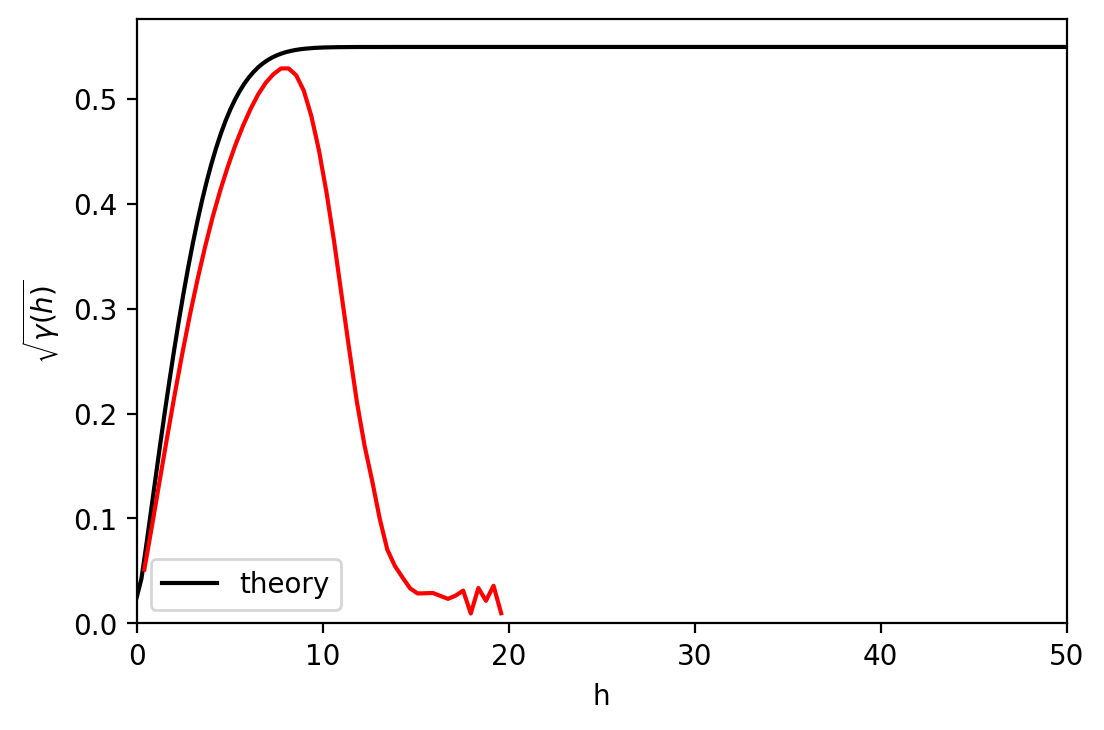

In [150]:
h = np.linspace(0, 50, 200)
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=np.sqrt(.3**2+sc**2), lc=4)
var_theo.draw()
plt.plot(h_exp, np.sqrt(var_exp_data),'r')
print(var_theo)

In [151]:
krig1 = Convolution_1D(sensors=sensors, variogram=var_theo, sampling=sampling, y_ideal=y_ideal)


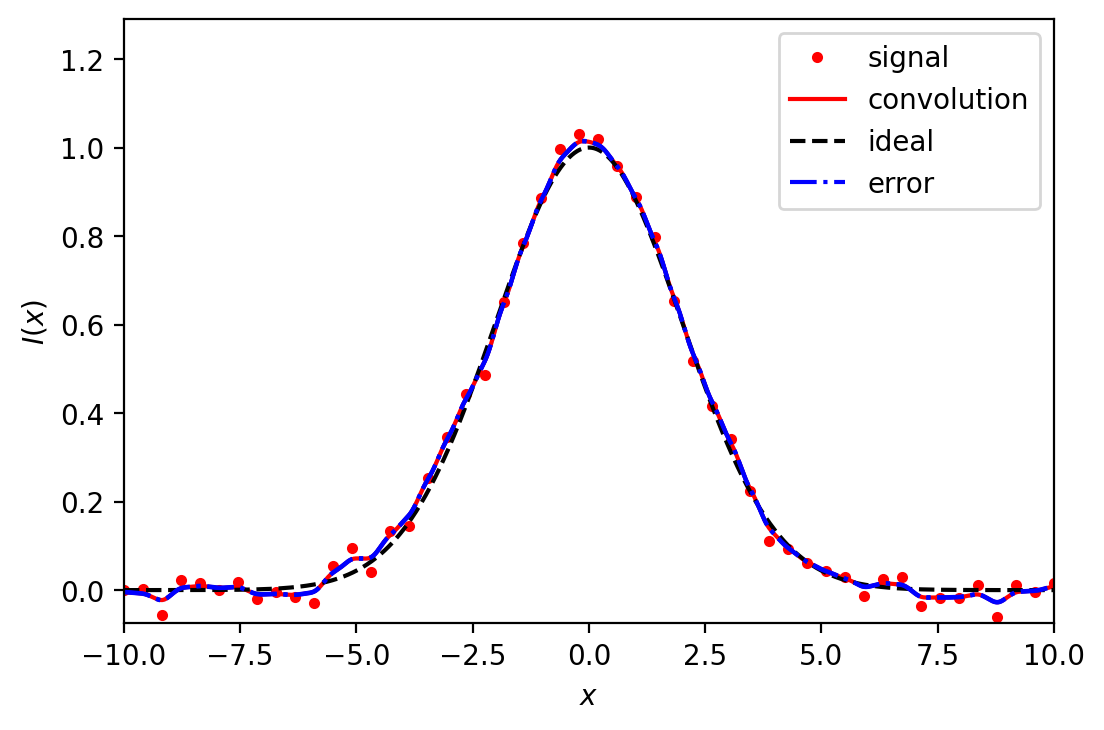

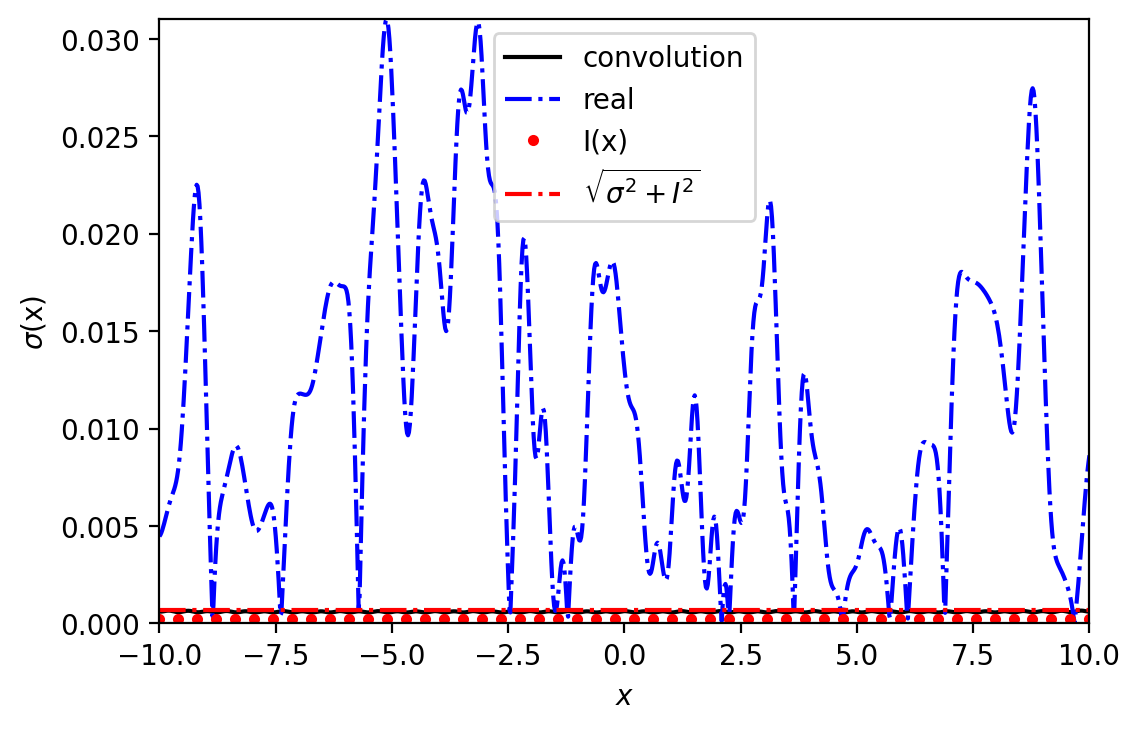

In [152]:
krig1.draw('compare')

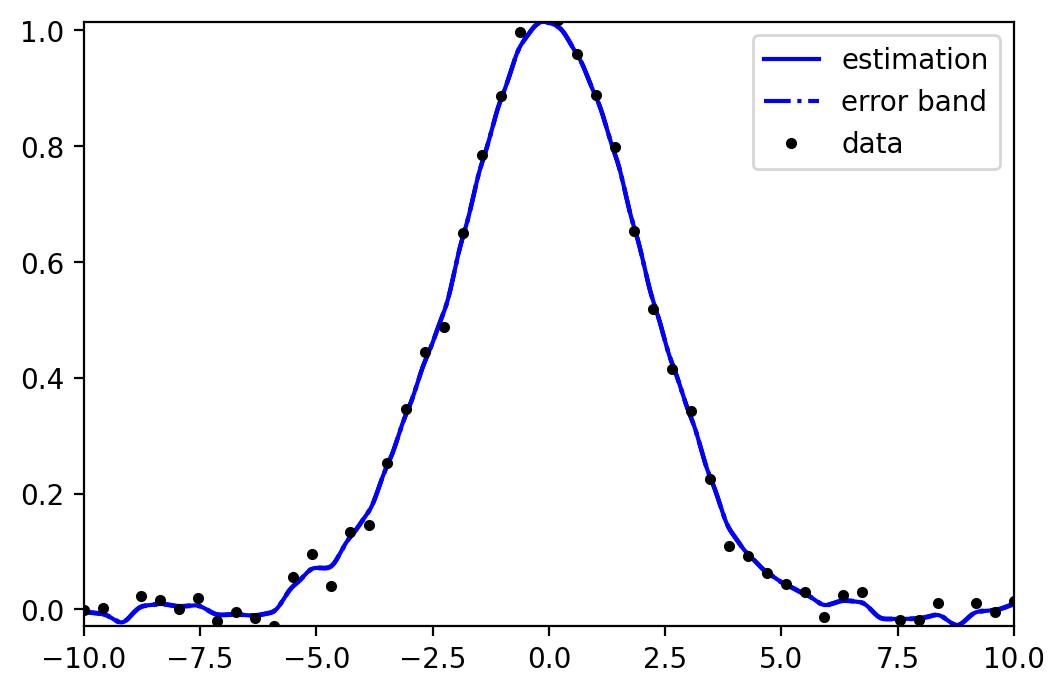

In [153]:
krig1.draw('estimation')

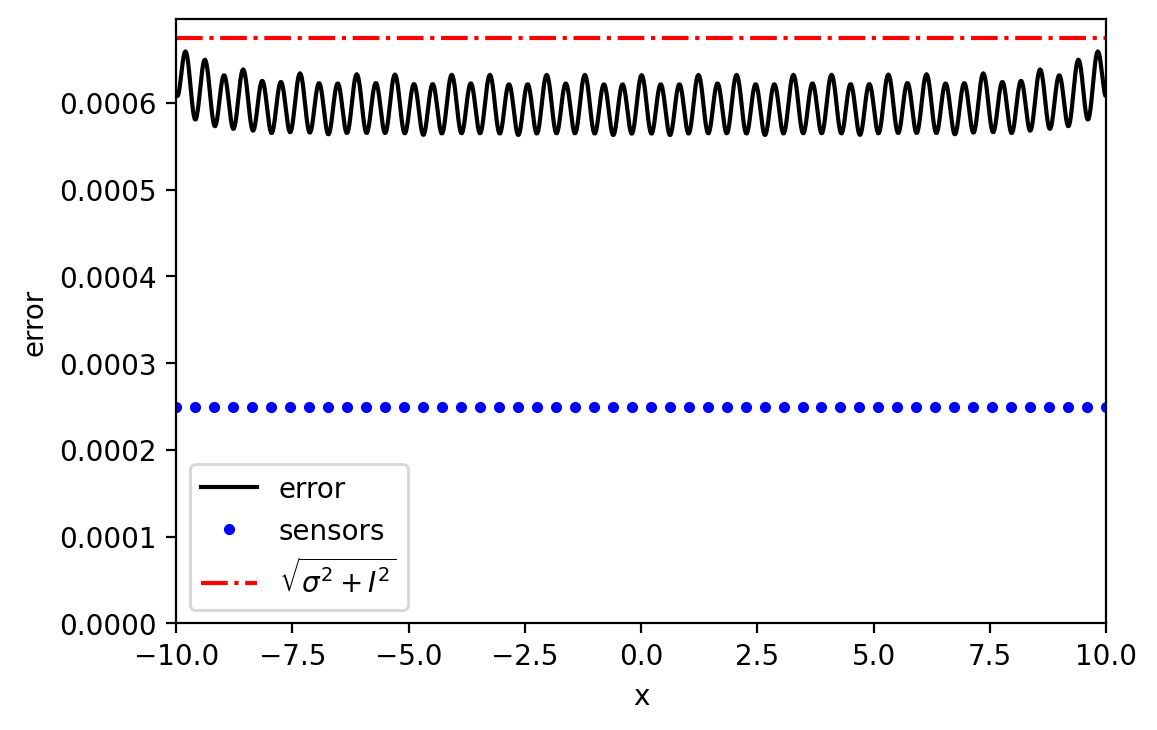

In [154]:
krig1.draw('error')

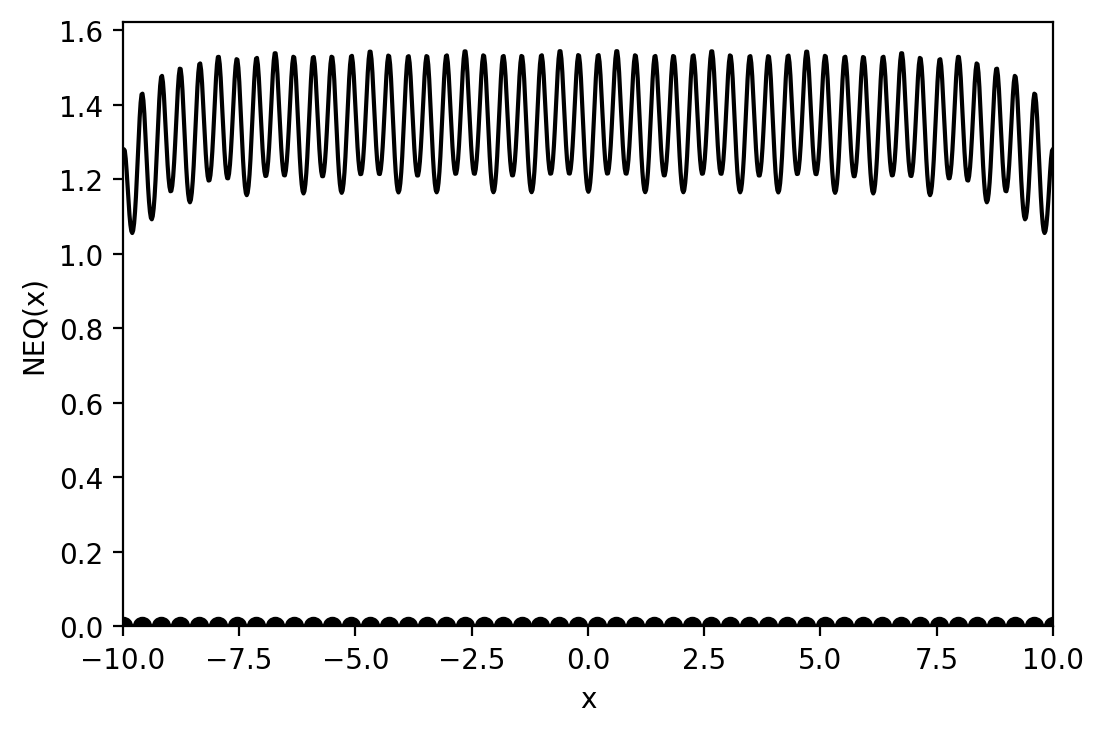

In [155]:
krig1.draw('NEQ')

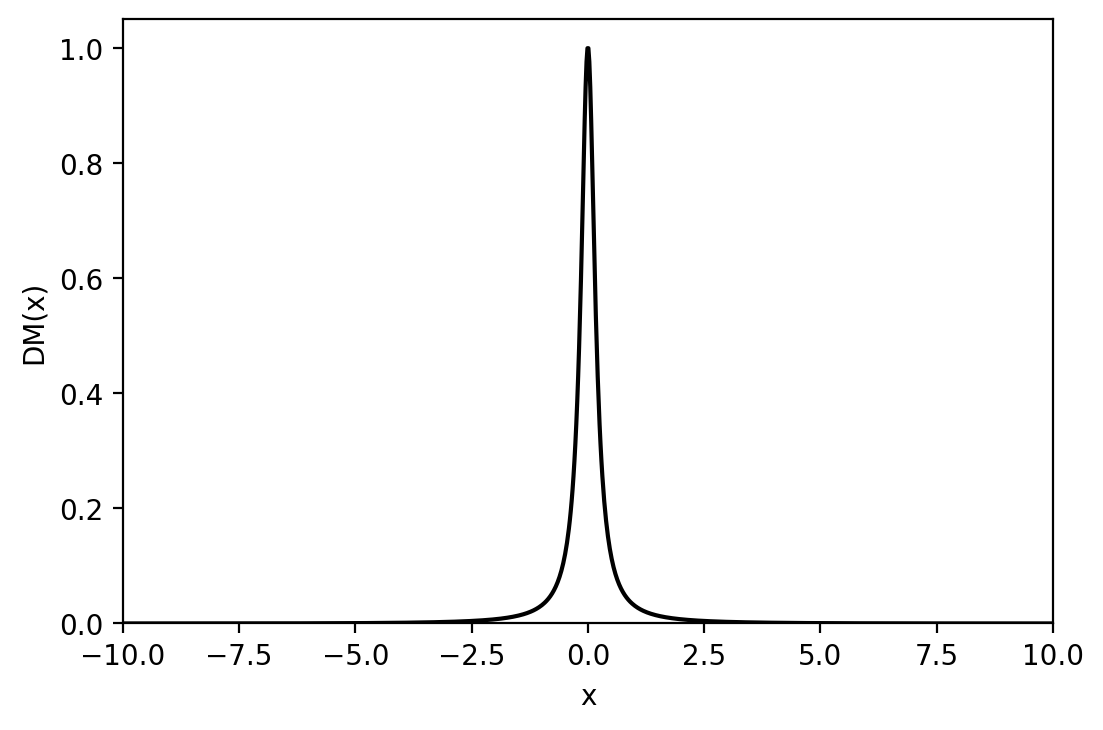

In [156]:
krig1.draw('DM')

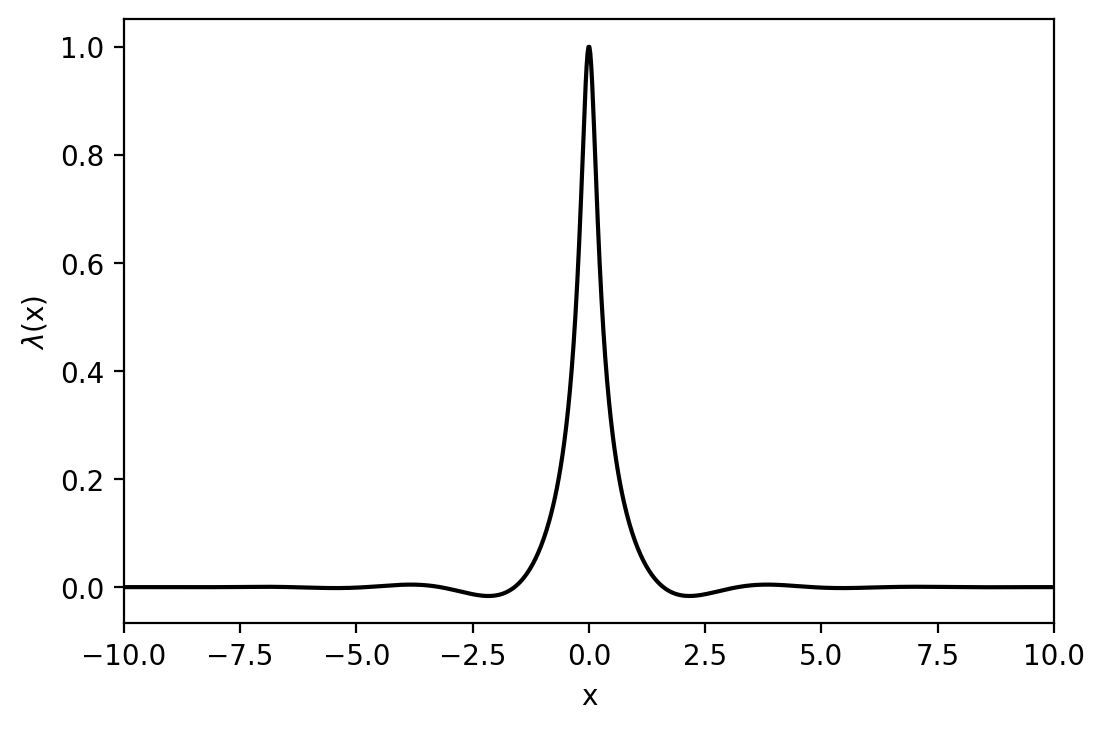

In [157]:
krig1.draw('lambda')